In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/account.csv')
data=pd.read_csv('/content/card.csv')
data=pd.read_csv('/content/client.csv')
data=pd.read_csv('/content/disp.csv')
data=pd.read_csv('/content/district.csv')
data=pd.read_csv('/content/loan.csv')
data=pd.read_csv('/content/order.csv')
data=pd.read_csv('/content/transaction_data.csv')

In [4]:
data.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [5]:
data.tail()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
9995,1146946,3923,930831,VYDAJ,VYBER,14.6,45164.9,SLUZBY,NaN,NaN
9996,2895444,9591,930831,PRIJEM,VKLAD,13451.0,69810.3,NaN,NaN,NaN
9997,2895787,9591,930831,VYDAJ,VYBER,14.6,69978.9,SLUZBY,NaN,NaN
9998,127798,428,930831,VYDAJ,VYBER,14.6,26671.5,SLUZBY,NaN,NaN
9999,126352,425,930831,VYDAJ,VYBER,3120.0,21395.8,NaN,NaN,NaN


In [6]:
df=data.drop(['bank','account','k_symbol'],axis=1)

In [7]:
df['type']=df['type'].apply({'VYDAJ':0,'PRIJEM':1,'VYBER':2}.get)

In [8]:
df['operation']=df['operation'].apply({'VYBER':0,'VKLAD':1,'PREVOD Z UCTU':2}.get)

In [9]:
df.head()

,trans_id,account_id,date,type,operation,amount,balance
0,695247,2378,930101,1,1.0,700.0,700.0
1,171812,576,930101,1,1.0,900.0,900.0
2,207264,704,930101,1,1.0,1000.0,1000.0
3,1117247,3818,930101,1,1.0,600.0,600.0
4,579373,1972,930102,1,1.0,400.0,400.0


In [10]:
df.tail()

,trans_id,account_id,date,type,operation,amount,balance
9995,1146946,3923,930831,0,0.0,14.6,45164.9
9996,2895444,9591,930831,1,1.0,13451.0,69810.3
9997,2895787,9591,930831,0,0.0,14.6,69978.9
9998,127798,428,930831,0,0.0,14.6,26671.5
9999,126352,425,930831,0,0.0,3120.0,21395.8


In [11]:
df.dropna(inplace=True)

In [12]:
from sklearn.cluster import KMeans
Kmeans=KMeans(8)

In [13]:
Kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [14]:
clusters=Kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
clusters

array([3, 5, 5, ..., 2, 5, 5], dtype=int32)

In [16]:
d_clusters=df.copy()
d_clusters['clusters']=clusters

In [17]:
import matplotlib.pyplot as plt

<Axes: >

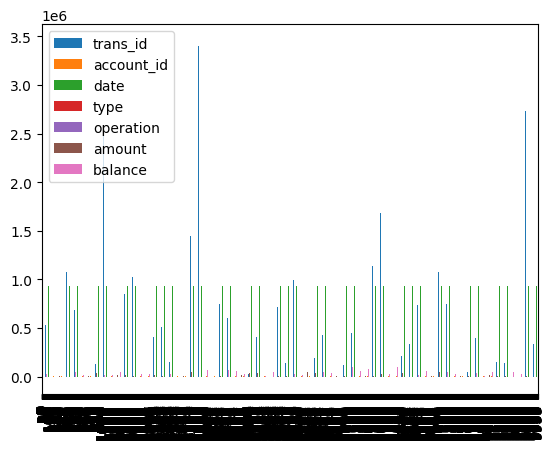

In [18]:
df.plot(kind='bar')

array([<Axes: ylabel='trans_id'>, <Axes: ylabel='account_id'>,
       <Axes: ylabel='date'>, <Axes: ylabel='type'>,
       <Axes: ylabel='operation'>, <Axes: ylabel='amount'>,
       <Axes: ylabel='balance'>], dtype=object)

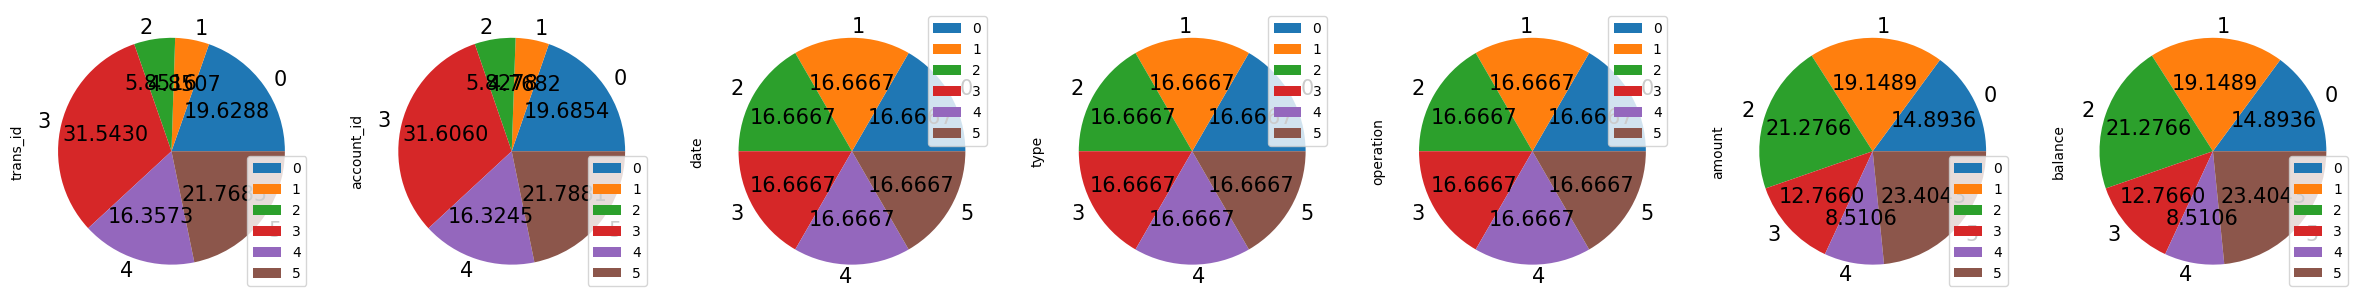

In [19]:
df.iloc[0:6].plot.pie(subplots=True,figsize=(30,10),fontsize=15,autopct='%.4f')

<Axes: ylabel='Frequency'>

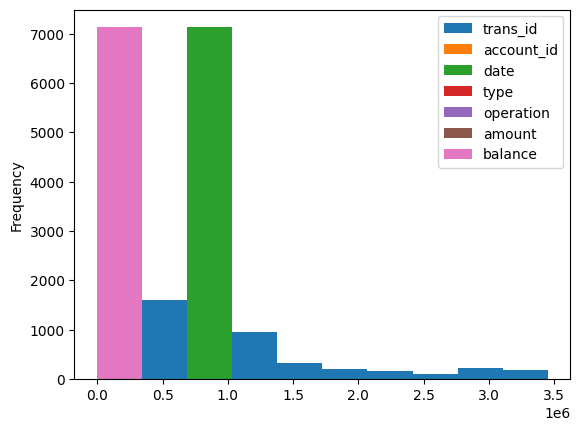

In [20]:
df.plot(kind='hist')

>KNN

```
# This is formatted as code
```



In [21]:
x=df.drop(['balance'],axis=1)
y=df['balance']
y=y.astype('int')

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [25]:
predictions=knn.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [27]:
print(cm)

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 2 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
print(ac)

0.007476635514018692


>DecisionTree

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier()

In [30]:
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
tree_predictions=tree_classifier.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,tree_predictions)
ac=accuracy_score(y_test,tree_predictions)

In [33]:
print(cm)

[[0 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [34]:
print(ac)

0.07663551401869159
